In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io

RECOVERED_URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
CONFIRMED_URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

global_recovered_csv = requests.get(RECOVERED_URL).content.decode('utf-8')
global_confirmed_csv = requests.get(CONFIRMED_URL).content.decode('utf-8')

df_recovered = pd.read_csv(io.StringIO(global_recovered_csv)).drop(['Lat', 'Long'], axis=1)
df_confirmed = pd.read_csv(io.StringIO(global_confirmed_csv)).drop(['Lat', 'Long'], axis=1)

In [2]:
df_recovered = df_recovered.groupby('Country/Region').sum().T.rename_axis('Date', axis=1)
df_confirmed = df_confirmed.groupby('Country/Region').sum().T.rename_axis('Date', axis=1)

df_recovered.index = pd.to_datetime(df_recovered.index)
df_confirmed.index = pd.to_datetime(df_confirmed.index)

df_recovered = df_recovered.asfreq('d')
df_confirmed = df_confirmed.asfreq('d')

In [3]:
def decumulation(df):
    return df.sub(df.shift()).iloc[1:]

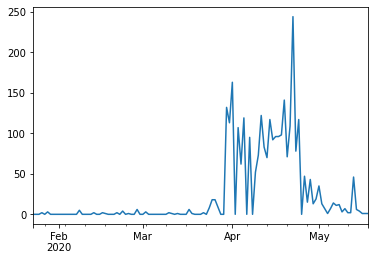

In [4]:
df_daily_recovered = decumulation(df_recovered)
df_daily_recovered.Thailand.plot()

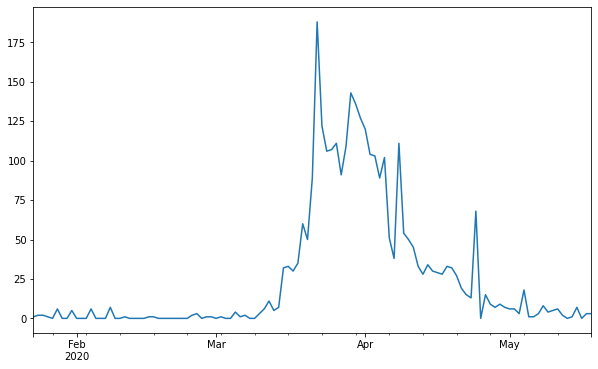

In [5]:
df_daily_confirmed = decumulation(df_confirmed)
df_daily_confirmed.Thailand.plot(figsize=(10, 6))

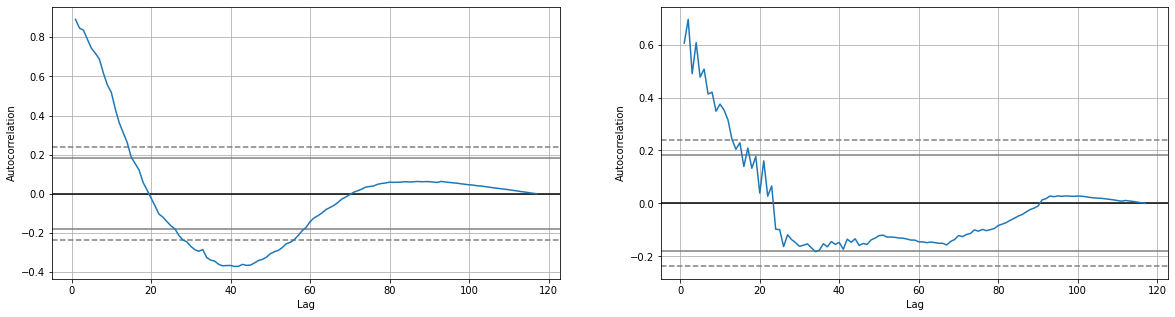

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
ax.set
pd.plotting.autocorrelation_plot(df_daily_confirmed.Thailand, ax=ax[0])
pd.plotting.autocorrelation_plot(df_daily_recovered.Thailand, ax=ax[1])

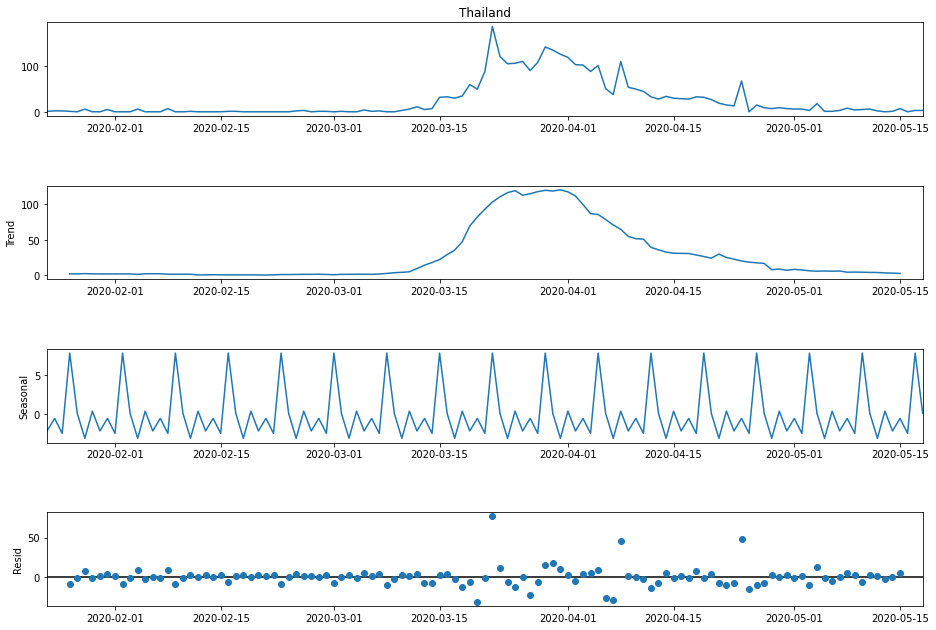

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(df_daily_confirmed.Thailand, model='additive')
x = decomposed.plot()
x.set_size_inches(15, 10)

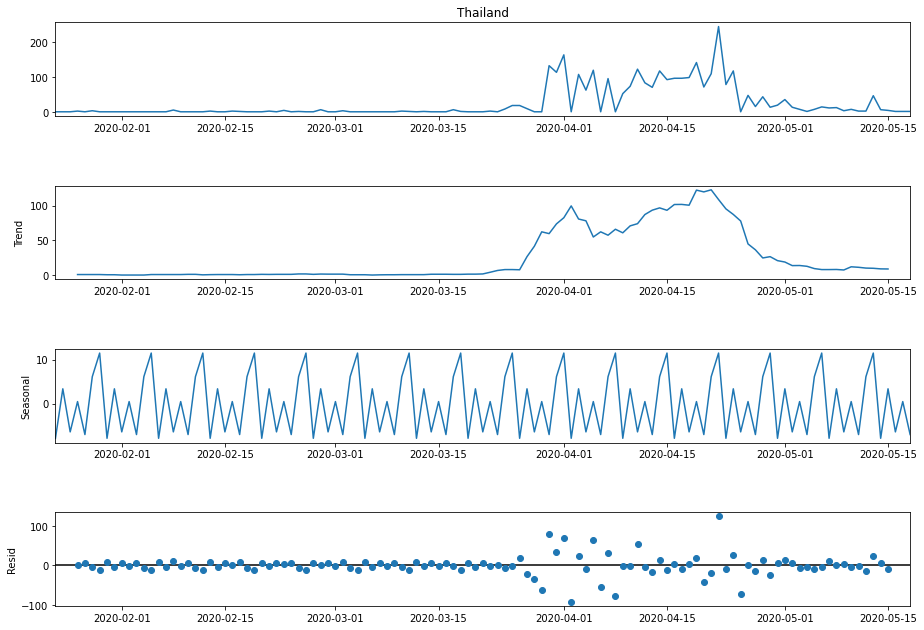

In [68]:
decomposed = seasonal_decompose(df_daily_recovered.Thailand, model='additive')
x = decomposed.plot()
x.set_size_inches(15, 10)

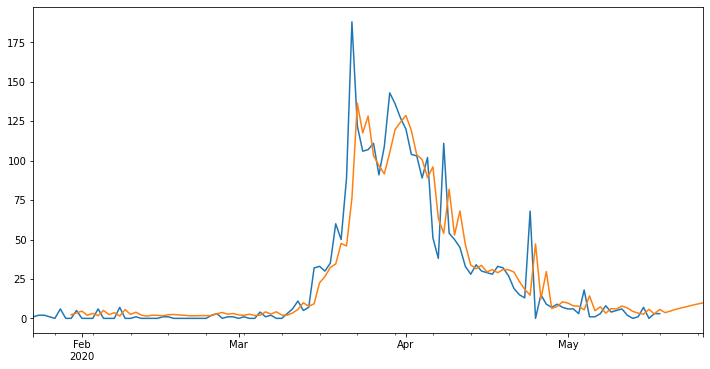

In [83]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(df_daily_confirmed.Thailand, 7)
df_daily_confirmed.Thailand.plot(figsize=(12, 6))
model.fit().predict(start=0, end=124).plot()

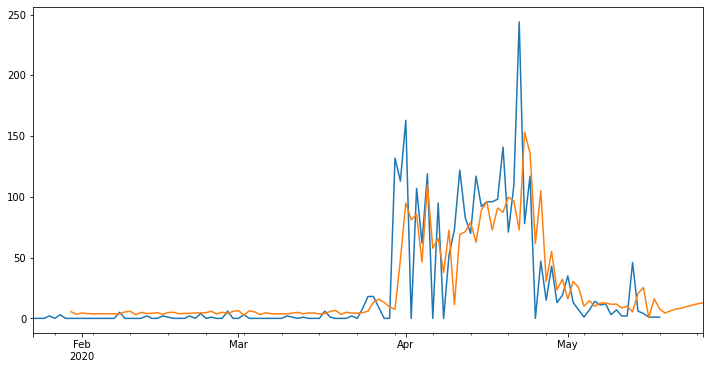

In [84]:
model = AutoReg(df_daily_recovered.Thailand, 7)
df_daily_recovered.Thailand.plot(figsize=(12, 6))
model.fit().predict(start=0, end=124).plot()